# Make sure you source 

`/projects/rpp-tanak-ab/machine_learning/data/IWCDmPMT_4pi/sourceme.sh`

This needs to be done before you launch jupyter notebook

In [1]:
import argparse
from root_utils.root_file_utils import *
from root_utils.pos_utils import *

# Loading WCSim from file

The function definition comes from `root_utils/root_file_utils.py`

When picking a root file make sure it is not `*_flat.root`
Need to talk to wojtek but those files don't work

Note each `wcsim` object contains multiple events. Each event is a a particular simulation. These events are stored in `wcsim.tree`

The `wcsim` object also contains `wcsim.geotree` which stores information regarding the geometry of the PMTs.

The file also contains `get_label` which just parses the file name for particle type and sets the label

- gamma = 0
- electron = 1
- muon = 2

In [2]:
input_file = "/project/rpp-tanaka-ab/machine_learning/data/IWCDmPMT_4pi/WCSim/gamma/E0to1000MeV/fix-pos-x0-y0-z0cm/4pi-dir/IWCDmPMT_4pi_gamma_E0to1000MeV_fix-pos-x0-y0-z0cm_4pi-dir_1000evts_0.root"
wcsim = WCSimFile(input_file)

number of entries in the geometry tree: 1
number of entries in the tree: 1000


In [3]:
get_label(input_file)

0

# Understanding the geometry. This should be the same for all wcsim

In [4]:
geo = wcsim.geo # Gets the geotree
num_pmts = geo.GetWCNumPMT()
print(num_pmts)

15808


In [5]:
position = [0,0,0]
orientation = [0,0,0]
for i in range(num_pmts):
    pmt = geo.GetPMT(i) # This is based on 0 based indexing
    pmt_id = pmt.GetTubeNo() # This literally will just return i + 1
    for j in range(3):
        position[j] = pmt.GetPosition(j) # Not too sure what is x,y,z
        orientation[j] = pmt.GetOrientation(j) # not too sure how direction is stored
    print(i, position, orientation)

0 [367.521240234375, 383.1295166015625, 28.463102340698242] [-0.7990566492080688, -0.5877852439880371, -0.12655813992023468]
1 [366.23394775390625, 385.33447265625, 36.590782165527344] [-0.8450315594673157, -0.5090369582176208, 0.1637161821126938]
2 [365.29156494140625, 391.3585205078125, 42.5406608581543] [-0.8786875605583191, -0.29389262199401855, 0.3762117326259613]
3 [364.9466552734375, 399.5874938964844, 44.71846389770508] [-0.8910065293312073, -5.773056945896621e-17, 0.45399048924446106]
4 [365.29156494140625, 407.8164978027344, 42.5406608581543] [-0.8786875605583191, 0.29389262199401855, 0.3762117326259613]
5 [366.23394775390625, 413.8405456542969, 36.590782165527344] [-0.8450315594673157, 0.5090369582176208, 0.1637161821126938]
6 [367.521240234375, 416.0455017089844, 28.463102340698242] [-0.7990566492080688, 0.5877852439880371, -0.12655813992023468]
7 [368.80853271484375, 413.8405456542969, 20.33542251586914] [-0.753081738948822, 0.5090369582176208, -0.41683244705200195]
8 [369

485 [-249.12911987304688, 391.3585205078125, -270.5223083496094] [0.21211791038513184, -0.29389262199401855, 0.9320048689842224]
486 [-244.86947631835938, 385.33447265625, -274.7819519042969] [0.3642479479312897, -0.5090369582176208, 0.779874861240387]
487 [-236.23846435546875, 390.9350280761719, -277.7884826660156] [0.6724985241889954, -0.30901700258255005, 0.6724985241889954]
488 [-230.93992614746094, 395.2612609863281, -283.0870361328125] [0.861732006072998, -0.15450850129127502, 0.4832650125026703]
489 [-230.93992614746094, 403.9137268066406, -283.0870361328125] [0.861732006072998, 0.15450850129127502, 0.4832650125026703]
490 [-236.23846435546875, 408.239990234375, -277.7884826660156] [0.6724985241889954, 0.30901700258255005, 0.6724985241889954]
491 [-241.53700256347656, 403.9137268066406, -272.4899597167969] [0.4832650125026703, 0.15450850129127502, 0.861732006072998]
492 [-241.53700256347656, 395.2612609863281, -272.4899597167969] [0.4832650125026703, -0.15450850129127502, 0.8617

652 [239.0507049560547, 416.0455017089844, -280.6007385253906] [-0.5720614194869995, 0.5877852439880371, 0.5720614194869995]
653 [233.23191833496094, 413.8405456542969, -286.4195251464844] [-0.779874861240387, 0.5090369582176208, 0.3642479479312897]
654 [228.97227478027344, 407.8164978027344, -290.67913818359375] [-0.9320048689842224, 0.29389262199401855, 0.21211791038513184]
655 [227.41314697265625, 399.5874938964844, -292.23828125] [-0.9876883625984192, 6.801524350452792e-17, 0.15643446147441864]
656 [228.97227478027344, 391.3585205078125, -290.67913818359375] [-0.9320048689842224, -0.29389262199401855, 0.21211791038513184]
657 [233.23191833496094, 385.33447265625, -286.4195251464844] [-0.779874861240387, -0.5090369582176208, 0.3642479479312897]
658 [236.23846435546875, 390.9350280761719, -277.7884826660156] [-0.6724985241889954, -0.30901700258255005, 0.6724985241889954]
659 [241.53700256347656, 395.2612609863281, -272.4899597167969] [-0.4832650125026703, -0.15450850129127502, 0.8617

999 [-133.30824279785156, 323.8594665527344, 344.4737854003906] [0.6291462779045105, -0.5090369582176208, -0.5874149799346924]
1000 [-138.8347625732422, 329.46002197265625, 337.1942443847656] [0.4317706227302551, -0.30901700258255005, -0.8473975658416748]
1001 [-145.5113067626953, 333.7862548828125, 333.7923889160156] [0.19332250952720642, -0.15450850129127502, -0.9688929319381714]
1002 [-145.5113067626953, 342.4387512207031, 333.7923889160156] [0.19332250952720642, 0.15450850129127502, -0.9688929319381714]
1003 [-138.8347625732422, 346.7649841308594, 337.1942443847656] [0.4317706227302551, 0.30901700258255005, -0.8473975658416748]
1004 [-132.15821838378906, 342.4387512207031, 340.59613037109375] [0.6702187061309814, 0.15450850129127502, -0.7259021997451782]
1005 [-132.15821838378906, 333.7862548828125, 340.59613037109375] [0.6702187061309814, -0.15450850129127502, -0.7259021997451782]
1006 [-138.2126007080078, 338.11248779296875, 335.97320556640625] [0.45399048924446106, -1.1579075384

1151 [-368.80853271484375, 323.8594665527344, -20.33542251586914] [0.753081738948822, -0.5090369582176208, 0.41683244705200195]
1152 [-363.5931091308594, 329.46002197265625, -27.840946197509766] [0.9393474459648132, -0.30901700258255005, 0.1487780213356018]
1153 [-362.4208984375, 333.7862548828125, -35.2419548034668] [0.9812119007110596, -0.15450850129127502, -0.11554374545812607]
1154 [-362.4208984375, 342.4387512207031, -35.2419548034668] [0.9812119007110596, 0.15450850129127502, -0.11554374545812607]
1155 [-363.5931091308594, 346.7649841308594, -27.840946197509766] [0.9393474459648132, 0.30901700258255005, 0.1487780213356018]
1156 [-364.7652893066406, 342.4387512207031, -20.439937591552734] [0.8974829912185669, 0.15450850129127502, 0.4130997657775879]
1157 [-364.7652893066406, 333.7862548828125, -20.439937591552734] [0.8974829912185669, -0.15450850129127502, 0.4130997657775879]
1158 [-362.23956298828125, 338.11248779296875, -27.62656593322754] [0.9876883625984192, -5.165349187422082

1648 [184.51431274414062, 280.9637451171875, 313.91937255859375] [-0.6702187061309814, 0.15450850129127502, -0.7259021997451782]
1649 [191.19085693359375, 285.28997802734375, 310.5174865722656] [-0.4317706227302551, 0.30901700258255005, -0.8473975658416748]
1650 [197.86740112304688, 280.9637451171875, 307.1156311035156] [-0.19332250952720642, 0.15450850129127502, -0.9688929319381714]
1651 [197.86740112304688, 272.3112487792969, 307.1156311035156] [-0.19332250952720642, -0.15450850129127502, -0.9688929319381714]
1652 [190.56871032714844, 276.63751220703125, 309.29644775390625] [-0.45399048924446106, -1.1579075384842254e-16, -0.8910065293312073]
1653 [140.6403350830078, 260.17950439453125, 340.7378845214844] [-0.3672860264778137, -0.5877852439880371, -0.7208394408226013]
1654 [133.30824279785156, 262.38446044921875, 344.4737854003906] [-0.6291462779045105, -0.5090369582176208, -0.5874149799346924]
1655 [127.94078063964844, 268.40850830078125, 347.2086181640625] [-0.8208412528038025, -0.2

1818 [-283.0870361328125, 272.3112487792969, 230.93992614746094] [0.4832650125026703, -0.15450850129127502, -0.861732006072998]
1819 [-283.0870361328125, 280.9637451171875, 230.93992614746094] [0.4832650125026703, 0.15450850129127502, -0.861732006072998]
1820 [-277.7884826660156, 285.28997802734375, 236.23846435546875] [0.6724985241889954, 0.30901700258255005, -0.6724985241889954]
1821 [-272.4899597167969, 280.9637451171875, 241.53700256347656] [0.861732006072998, 0.15450850129127502, -0.4832650125026703]
1822 [-272.4899597167969, 272.3112487792969, 241.53700256347656] [0.861732006072998, -0.15450850129127502, -0.4832650125026703]
1823 [-276.8194580078125, 276.63751220703125, 235.26942443847656] [0.7071067690849304, -1.0453014564639116e-16, -0.7071067690849304]
1824 [-314.0611267089844, 260.17950439453125, 192.99642944335938] [0.7208394408226013, -0.5877852439880371, -0.3672860264778137]
1825 [-317.7969970703125, 262.38446044921875, 185.66433715820312] [0.5874149799346924, -0.509036958

2151 [205.69598388671875, 284.8664855957031, -307.5903625488281] [0.08626922219991684, 0.29389262199401855, 0.9519373774528503]
2152 [200.32852172851562, 290.8905334472656, -310.3252258300781] [-0.10542578250169754, 0.5090369582176208, 0.8542639017105103]
2153 [192.99642944335938, 293.0954895019531, -314.0611267089844] [-0.3672860264778137, 0.5877852439880371, 0.7208394408226013]
2154 [185.66433715820312, 290.8905334472656, -317.7969970703125] [-0.6291462779045105, 0.5090369582176208, 0.5874149799346924]
2155 [180.29689025878906, 284.8664855957031, -320.5318603515625] [-0.8208412528038025, 0.29389262199401855, 0.4897414743900299]
2156 [178.33226013183594, 276.63751220703125, -321.53289794921875] [-0.8910065293312073, 8.623529939432725e-17, 0.45399048924446106]
2157 [180.29689025878906, 268.40850830078125, -320.5318603515625] [-0.8208412528038025, -0.29389262199401855, 0.4897414743900299]
2158 [185.66433715820312, 262.38446044921875, -317.7969970703125] [-0.6291462779045105, -0.50903695

2317 [353.04736328125, 215.16250610351562, 85.66374969482422] [-0.9876883625984192, -7.081118676685106e-17, -0.15643446147441864]
2318 [340.7378845214844, 198.7045135498047, 140.6403350830078] [-0.7208394408226013, -0.5877852439880371, -0.3672860264778137]
2319 [337.00201416015625, 200.9094696044922, 147.972412109375] [-0.8542639017105103, -0.5090369582176208, -0.10542578250169754]
2320 [334.26715087890625, 206.93350219726562, 153.33987426757812] [-0.9519373774528503, -0.29389262199401855, 0.08626922219991684]
2321 [333.26611328125, 215.16250610351562, 155.30450439453125] [-0.9876883625984192, -7.595061873132063e-17, 0.15643446147441864]
2322 [334.26715087890625, 223.39149475097656, 153.33987426757812] [-0.9519373774528503, 0.29389262199401855, 0.08626922219991684]
2323 [337.00201416015625, 229.41552734375, 147.972412109375] [-0.8542639017105103, 0.5090369582176208, -0.10542578250169754]
2324 [340.7378845214844, 231.6204833984375, 140.6403350830078] [-0.7208394408226013, 0.587785243988

2817 [-78.37261199951172, 229.41552734375, -359.6163635253906] [0.41683244705200195, 0.5090369582176208, 0.753081738948822]
2818 [-86.50028991699219, 231.6204833984375, -358.32904052734375] [0.12655813992023468, 0.5877852439880371, 0.7990566492080688]
2819 [-94.62796783447266, 229.41552734375, -357.041748046875] [-0.1637161821126938, 0.5090369582176208, 0.8450315594673157]
2820 [-100.57784271240234, 223.39149475097656, -356.0993957519531] [-0.3762117326259613, 0.29389262199401855, 0.8786875605583191]
2821 [-102.75565338134766, 215.16250610351562, -355.75445556640625] [-0.45399048924446106, 1.129948039686545e-16, 0.8910065293312073]
2822 [-100.57784271240234, 206.93350219726562, -356.0993957519531] [-0.3762117326259613, -0.29389262199401855, 0.8786875605583191]
2823 [-94.62796783447266, 200.9094696044922, -357.041748046875] [-0.1637161821126938, -0.5090369582176208, 0.8450315594673157]
2824 [-85.87813568115234, 206.51002502441406, -354.4009094238281] [0.1487780213356018, -0.309017002582

2984 [344.4737854003906, 200.9094696044922, -133.30824279785156] [-0.5874149799346924, -0.5090369582176208, 0.6291462779045105]
2985 [347.2086181640625, 206.93350219726562, -127.94078063964844] [-0.4897414743900299, -0.29389262199401855, 0.8208412528038025]
2986 [348.20965576171875, 215.16250610351562, -125.97615051269531] [-0.45399048924446106, -3.0971054958471597e-17, 0.8910065293312073]
2987 [347.2086181640625, 223.39149475097656, -127.94078063964844] [-0.4897414743900299, 0.29389262199401855, 0.8208412528038025]
2988 [344.4737854003906, 229.41552734375, -133.30824279785156] [-0.5874149799346924, 0.5090369582176208, 0.6291462779045105]
2989 [340.7378845214844, 231.6204833984375, -140.6403350830078] [-0.7208394408226013, 0.5877852439880371, 0.3672860264778137]
2990 [337.00201416015625, 229.41552734375, -147.972412109375] [-0.8542639017105103, 0.5090369582176208, 0.10542578250169754]
2991 [334.26715087890625, 223.39149475097656, -153.33987426757812] [-0.9519373774528503, 0.29389262199

3484 [-317.7969970703125, 167.94053649902344, -185.66433715820312] [0.5874149799346924, 0.5090369582176208, 0.6291462779045105]
3485 [-320.5318603515625, 161.91648864746094, -180.29689025878906] [0.4897414743900299, 0.29389262199401855, 0.8208412528038025]
3486 [-321.53289794921875, 153.6875, -178.33226013183594] [0.45399048924446106, 1.129948039686545e-16, 0.8910065293312073]
3487 [-320.5318603515625, 145.45851135253906, -180.29689025878906] [0.4897414743900299, -0.29389262199401855, 0.8208412528038025]
3488 [-317.7969970703125, 139.43446350097656, -185.66433715820312] [0.5874149799346924, -0.5090369582176208, 0.6291462779045105]
3489 [-310.5174865722656, 145.03501892089844, -191.19085693359375] [0.8473975658416748, -0.30901700258255005, 0.4317706227302551]
3490 [-307.1156311035156, 149.36126708984375, -197.86740112304688] [0.9688929319381714, -0.15450850129127502, 0.19332250952720642]
3491 [-307.1156311035156, 158.01373291015625, -197.86740112304688] [0.9688929319381714, 0.1545085012

3650 [153.33987426757812, 145.45851135253906, -334.26715087890625] [0.08626922219991684, -0.29389262199401855, 0.9519373774528503]
3651 [155.30450439453125, 153.6875, -333.26611328125] [0.15643446147441864, -2.5051001069407158e-17, 0.9876883625984192]
3652 [153.33987426757812, 161.91648864746094, -334.26715087890625] [0.08626922219991684, 0.29389262199401855, 0.9519373774528503]
3653 [147.972412109375, 167.94053649902344, -337.00201416015625] [-0.10542578250169754, 0.5090369582176208, 0.8542639017105103]
3654 [140.6403350830078, 170.14549255371094, -340.7378845214844] [-0.3672860264778137, 0.5877852439880371, 0.7208394408226013]
3655 [133.30824279785156, 167.94053649902344, -344.4737854003906] [-0.6291462779045105, 0.5090369582176208, 0.5874149799346924]
3656 [127.94078063964844, 161.91648864746094, -347.2086181640625] [-0.8208412528038025, 0.29389262199401855, 0.4897414743900299]
3657 [125.97615051269531, 153.6875, -348.20965576171875] [-0.8910065293312073, 8.623529939432725e-17, 0.45

3983 [27.840946197509766, 83.56002044677734, 363.5931091308594] [-0.1487780213356018, -0.30901700258255005, -0.9393474459648132]
3984 [20.439937591552734, 87.88626098632812, 364.7652893066406] [-0.4130997657775879, -0.15450850129127502, -0.8974829912185669]
3985 [20.439937591552734, 96.53873443603516, 364.7652893066406] [-0.4130997657775879, 0.15450850129127502, -0.8974829912185669]
3986 [27.840946197509766, 100.86497497558594, 363.5931091308594] [-0.1487780213356018, 0.30901700258255005, -0.9393474459648132]
3987 [35.2419548034668, 96.53873443603516, 362.4208984375] [0.11554374545812607, 0.15450850129127502, -0.9812119007110596]
3988 [35.2419548034668, 87.88626098632812, 362.4208984375] [0.11554374545812607, -0.15450850129127502, -0.9812119007110596]
3989 [27.62656593322754, 92.2125015258789, 362.23956298828125] [-0.15643446147441864, -1.2171081270057066e-16, -0.9876883625984192]
3990 [-28.463102340698242, 75.7545166015625, 367.521240234375] [0.12655813992023468, -0.5877852439880371, 

4176 [-363.5931091308594, 100.86497497558594, 27.840946197509766] [0.9393474459648132, 0.30901700258255005, -0.1487780213356018]
4177 [-362.4208984375, 96.53873443603516, 35.2419548034668] [0.9812119007110596, 0.15450850129127502, 0.11554374545812607]
4178 [-362.4208984375, 87.88626098632812, 35.2419548034668] [0.9812119007110596, -0.15450850129127502, 0.11554374545812607]
4179 [-362.23956298828125, 92.2125015258789, 27.62656593322754] [0.9876883625984192, -7.081118676685106e-17, -0.15643446147441864]
4180 [-367.521240234375, 75.7545166015625, -28.463102340698242] [0.7990566492080688, -0.5877852439880371, 0.12655813992023468]
4181 [-366.23394775390625, 77.95946502685547, -36.590782165527344] [0.8450315594673157, -0.5090369582176208, -0.1637161821126938]
4182 [-365.29156494140625, 83.98350524902344, -42.5406608581543] [0.8786875605583191, -0.29389262199401855, -0.3762117326259613]
4183 [-364.9466552734375, 92.2125015258789, -44.71846389770508] [0.8910065293312073, -1.133283761311951e-16

4483 [276.8194580078125, 92.2125015258789, -235.26942443847656] [-0.7071067690849304, -1.7934537957764396e-17, 0.7071067690849304]
4484 [314.0611267089844, 75.7545166015625, -192.99642944335938] [-0.7208394408226013, -0.5877852439880371, 0.3672860264778137]
4485 [317.7969970703125, 77.95946502685547, -185.66433715820312] [-0.5874149799346924, -0.5090369582176208, 0.6291462779045105]
4486 [320.5318603515625, 83.98350524902344, -180.29689025878906] [-0.4897414743900299, -0.29389262199401855, 0.8208412528038025]
4487 [321.53289794921875, 92.2125015258789, -178.33226013183594] [-0.45399048924446106, -3.0971054958471597e-17, 0.8910065293312073]
4488 [320.5318603515625, 100.44149017333984, -180.29689025878906] [-0.4897414743900299, 0.29389262199401855, 0.8208412528038025]
4489 [317.7969970703125, 106.46553802490234, -185.66433715820312] [-0.5874149799346924, 0.5090369582176208, 0.6291462779045105]
4490 [314.0611267089844, 108.67048645019531, -192.99642944335938] [-0.7208394408226013, 0.58778

4649 [272.4899597167969, 26.41126251220703, 241.53700256347656] [-0.861732006072998, -0.15450850129127502, -0.4832650125026703]
4650 [272.4899597167969, 35.06373977661133, 241.53700256347656] [-0.861732006072998, 0.15450850129127502, -0.4832650125026703]
4651 [277.7884826660156, 39.389976501464844, 236.23846435546875] [-0.6724985241889954, 0.30901700258255005, -0.6724985241889954]
4652 [283.0870361328125, 35.06373977661133, 230.93992614746094] [-0.4832650125026703, 0.15450850129127502, -0.861732006072998]
4653 [283.0870361328125, 26.41126251220703, 230.93992614746094] [-0.4832650125026703, -0.15450850129127502, -0.861732006072998]
4654 [276.8194580078125, 30.737499237060547, 235.26942443847656] [-0.7071067690849304, -1.0453014564639116e-16, -0.7071067690849304]
4655 [239.0507049560547, 14.279513359069824, 280.6007385253906] [-0.5720614194869995, -0.5877852439880371, -0.5720614194869995]
4656 [233.23191833496094, 16.484464645385742, 286.4195251464844] [-0.779874861240387, -0.50903695821

5149 [86.50028991699219, 14.279513359069824, -358.32904052734375] [-0.12655813992023468, -0.5877852439880371, 0.7990566492080688]
5150 [94.62796783447266, 16.484464645385742, -357.041748046875] [0.1637161821126938, -0.5090369582176208, 0.8450315594673157]
5151 [100.57784271240234, 22.508506774902344, -356.0993957519531] [0.3762117326259613, -0.29389262199401855, 0.8786875605583191]
5152 [102.75565338134766, 30.737499237060547, -355.75445556640625] [0.45399048924446106, -3.0971054958471597e-17, 0.8910065293312073]
5153 [100.57784271240234, 38.96649169921875, -356.0993957519531] [0.3762117326259613, 0.29389262199401855, 0.8786875605583191]
5154 [94.62796783447266, 44.990535736083984, -357.041748046875] [0.1637161821126938, 0.5090369582176208, 0.8450315594673157]
5155 [86.50028991699219, 47.19548797607422, -358.32904052734375] [-0.12655813992023468, 0.5877852439880371, 0.7990566492080688]
5156 [78.37261199951172, 44.990535736083984, -359.6163635253906] [-0.41683244705200195, 0.50903695821

5316 [363.5931091308594, 39.389976501464844, -27.840946197509766] [-0.9393474459648132, 0.30901700258255005, 0.1487780213356018]
5317 [362.4208984375, 35.06373977661133, -35.2419548034668] [-0.9812119007110596, 0.15450850129127502, -0.11554374545812607]
5318 [362.4208984375, 26.41126251220703, -35.2419548034668] [-0.9812119007110596, -0.15450850129127502, -0.11554374545812607]
5319 [362.23956298828125, 30.737499237060547, -27.62656593322754] [-0.9876883625984192, -5.1653491874220826e-17, 0.15643446147441864]
5320 [367.521240234375, -47.19548797607422, 28.463102340698242] [-0.7990566492080688, -0.5877852439880371, -0.12655813992023468]
5321 [366.23394775390625, -44.990535736083984, 36.590782165527344] [-0.8450315594673157, -0.5090369582176208, 0.1637161821126938]
5322 [365.29156494140625, -38.96649169921875, 42.5406608581543] [-0.8786875605583191, -0.29389262199401855, 0.3762117326259613]
5323 [364.9466552734375, -30.737499237060547, 44.71846389770508] [-0.8910065293312073, -5.773056945

5748 [-347.2086181640625, -38.96649169921875, -127.94078063964844] [0.4897414743900299, -0.29389262199401855, 0.8208412528038025]
5749 [-344.4737854003906, -44.990535736083984, -133.30824279785156] [0.5874149799346924, -0.5090369582176208, 0.6291462779045105]
5750 [-337.1942443847656, -39.389976501464844, -138.8347625732422] [0.8473975658416748, -0.30901700258255005, 0.4317706227302551]
5751 [-333.7923889160156, -35.06373977661133, -145.5113067626953] [0.9688929319381714, -0.15450850129127502, 0.19332250952720642]
5752 [-333.7923889160156, -26.41126251220703, -145.5113067626953] [0.9688929319381714, 0.15450850129127502, 0.19332250952720642]
5753 [-337.1942443847656, -22.085023880004883, -138.8347625732422] [0.8473975658416748, 0.30901700258255005, 0.4317706227302551]
5754 [-340.59613037109375, -26.41126251220703, -132.15821838378906] [0.7259021997451782, 0.15450850129127502, 0.6702187061309814]
5755 [-340.59613037109375, -35.06373977661133, -132.15821838378906] [0.7259021997451782, -0.

5982 [230.93992614746094, -26.41126251220703, -283.0870361328125] [-0.861732006072998, 0.15450850129127502, 0.4832650125026703]
5983 [230.93992614746094, -35.06373977661133, -283.0870361328125] [-0.861732006072998, -0.15450850129127502, 0.4832650125026703]
5984 [235.26942443847656, -30.737499237060547, -276.8194580078125] [-0.7071067690849304, -1.7934537957764396e-17, 0.7071067690849304]
5985 [280.6007385253906, -47.19548797607422, -239.0507049560547] [-0.5720614194869995, -0.5877852439880371, 0.5720614194869995]
5986 [286.4195251464844, -44.990535736083984, -233.23191833496094] [-0.3642479479312897, -0.5090369582176208, 0.779874861240387]
5987 [290.67913818359375, -38.96649169921875, -228.97227478027344] [-0.21211791038513184, -0.29389262199401855, 0.9320048689842224]
5988 [292.23828125, -30.737499237060547, -227.41314697265625] [-0.15643446147441864, -2.5051001069407158e-17, 0.9876883625984192]
5989 [290.67913818359375, -22.508506774902344, -228.97227478027344] [-0.21211791038513184,

6354 [-228.97227478027344, -83.98350524902344, 290.67913818359375] [0.9320048689842224, 0.29389262199401855, -0.21211791038513184]
6355 [-227.41314697265625, -92.2125015258789, 292.23828125] [0.9876883625984192, 4.885754861189769e-17, -0.15643446147441864]
6356 [-228.97227478027344, -100.44149017333984, 290.67913818359375] [0.9320048689842224, -0.29389262199401855, -0.21211791038513184]
6357 [-233.23191833496094, -106.46553802490234, 286.4195251464844] [0.779874861240387, -0.5090369582176208, -0.3642479479312897]
6358 [-236.23846435546875, -100.86497497558594, 277.7884826660156] [0.6724985241889954, -0.30901700258255005, -0.6724985241889954]
6359 [-241.53700256347656, -96.53873443603516, 272.4899597167969] [0.4832650125026703, -0.15450850129127502, -0.861732006072998]
6360 [-241.53700256347656, -87.88626098632812, 272.4899597167969] [0.4832650125026703, 0.15450850129127502, -0.861732006072998]
6361 [-236.23846435546875, -83.56002044677734, 277.7884826660156] [0.6724985241889954, 0.3090

6592 [-190.56871032714844, -92.2125015258789, -309.29644775390625] [0.45399048924446106, -6.673925619829955e-18, 0.8910065293312073]
6593 [-140.6403350830078, -108.67048645019531, -340.7378845214844] [0.3672860264778137, -0.5877852439880371, 0.7208394408226013]
6594 [-133.30824279785156, -106.46553802490234, -344.4737854003906] [0.6291462779045105, -0.5090369582176208, 0.5874149799346924]
6595 [-127.94078063964844, -100.44149017333984, -347.2086181640625] [0.8208412528038025, -0.29389262199401855, 0.4897414743900299]
6596 [-125.97615051269531, -92.2125015258789, -348.20965576171875] [0.8910065293312073, -5.773056945896621e-17, 0.45399048924446106]
6597 [-127.94078063964844, -83.98350524902344, -347.2086181640625] [0.8208412528038025, 0.29389262199401855, 0.4897414743900299]
6598 [-133.30824279785156, -77.95946502685547, -344.4737854003906] [0.6291462779045105, 0.5090369582176208, 0.5874149799346924]
6599 [-140.6403350830078, -75.7545166015625, -340.7378845214844] [0.3672860264778137, 0

6982 [155.30450439453125, -153.6875, 333.26611328125] [0.15643446147441864, -2.0420727723285414e-18, -0.9876883625984192]
6983 [153.33987426757812, -161.91648864746094, 334.26715087890625] [0.08626922219991684, -0.29389262199401855, -0.9519373774528503]
6984 [147.972412109375, -167.94053649902344, 337.00201416015625] [-0.10542578250169754, -0.5090369582176208, -0.8542639017105103]
6985 [138.8347625732422, -162.33998107910156, 337.1942443847656] [-0.4317706227302551, -0.30901700258255005, -0.8473975658416748]
6986 [132.15821838378906, -158.01373291015625, 340.59613037109375] [-0.6702187061309814, -0.15450850129127502, -0.7259021997451782]
6987 [132.15821838378906, -149.36126708984375, 340.59613037109375] [-0.6702187061309814, 0.15450850129127502, -0.7259021997451782]
6988 [138.8347625732422, -145.03501892089844, 337.1942443847656] [-0.4317706227302551, 0.30901700258255005, -0.8473975658416748]
6989 [145.5113067626953, -149.36126708984375, 333.7923889160156] [-0.19332250952720642, 0.1545

7315 [-239.0507049560547, -170.14549255371094, -280.6007385253906] [0.5720614194869995, -0.5877852439880371, 0.5720614194869995]
7316 [-233.23191833496094, -167.94053649902344, -286.4195251464844] [0.779874861240387, -0.5090369582176208, 0.3642479479312897]
7317 [-228.97227478027344, -161.91648864746094, -290.67913818359375] [0.9320048689842224, -0.29389262199401855, 0.21211791038513184]
7318 [-227.41314697265625, -153.6875, -292.23828125] [0.9876883625984192, -7.595061873132063e-17, 0.15643446147441864]
7319 [-228.97227478027344, -145.45851135253906, -290.67913818359375] [0.9320048689842224, 0.29389262199401855, 0.21211791038513184]
7320 [-233.23191833496094, -139.43446350097656, -286.4195251464844] [0.779874861240387, 0.5090369582176208, 0.3642479479312897]
7321 [-239.0507049560547, -137.22950744628906, -280.6007385253906] [0.5720614194869995, 0.5877852439880371, 0.5720614194869995]
7322 [-244.86947631835938, -139.43446350097656, -274.7819519042969] [0.3642479479312897, 0.50903695821

7716 [180.29689025878906, -223.39149475097656, 320.5318603515625] [-0.8208412528038025, -0.29389262199401855, -0.4897414743900299]
7717 [178.33226013183594, -215.16250610351562, 321.53289794921875] [-0.8910065293312073, -1.133283761311951e-16, -0.45399048924446106]
7718 [180.29689025878906, -206.93350219726562, 320.5318603515625] [-0.8208412528038025, 0.29389262199401855, -0.4897414743900299]
7719 [185.66433715820312, -200.9094696044922, 317.7969970703125] [-0.6291462779045105, 0.5090369582176208, -0.5874149799346924]
7720 [192.99642944335938, -198.7045135498047, 314.0611267089844] [-0.3672860264778137, 0.5877852439880371, -0.7208394408226013]
7721 [200.32852172851562, -200.9094696044922, 310.3252258300781] [-0.10542578250169754, 0.5090369582176208, -0.8542639017105103]
7722 [205.69598388671875, -206.93350219726562, 307.5903625488281] [0.08626922219991684, 0.29389262199401855, -0.9519373774528503]
7723 [207.6605987548828, -215.16250610351562, 306.58935546875] [0.15643446147441864, -2.0

8148 [-93.27914428710938, -210.8362579345703, -353.22869873046875] [-0.11554374545812607, 0.15450850129127502, 0.9812119007110596]
8149 [-93.27914428710938, -219.48873901367188, -353.22869873046875] [-0.11554374545812607, -0.15450850129127502, 0.9812119007110596]
8150 [-85.66374969482422, -215.16250610351562, -353.04736328125] [0.15643446147441864, -7.538717307655156e-19, 0.9876883625984192]
8151 [-28.463102340698242, -231.6204833984375, -367.521240234375] [0.12655813992023468, -0.5877852439880371, 0.7990566492080688]
8152 [-20.33542251586914, -229.41552734375, -368.80853271484375] [0.41683244705200195, -0.5090369582176208, 0.753081738948822]
8153 [-14.385546684265137, -223.39149475097656, -369.75091552734375] [0.6293280124664307, -0.29389262199401855, 0.7194257378578186]
8154 [-12.207740783691406, -215.16250610351562, -370.0958251953125] [0.7071067690849304, -4.2231666469225425e-17, 0.7071067690849304]
8155 [-14.385546684265137, -206.93350219726562, -369.75091552734375] [0.62932801246

8440 [270.5223083496094, -268.40850830078125, 249.12911987304688] [-0.9320048689842224, 0.29389262199401855, -0.21211791038513184]
8441 [274.7819519042969, -262.38446044921875, 244.86947631835938] [-0.779874861240387, 0.5090369582176208, -0.3642479479312897]
8442 [280.6007385253906, -260.17950439453125, 239.0507049560547] [-0.5720614194869995, 0.5877852439880371, -0.5720614194869995]
8443 [286.4195251464844, -262.38446044921875, 233.23191833496094] [-0.3642479479312897, 0.5090369582176208, -0.779874861240387]
8444 [290.67913818359375, -268.40850830078125, 228.97227478027344] [-0.21211791038513184, 0.29389262199401855, -0.9320048689842224]
8445 [292.23828125, -276.63751220703125, 227.41314697265625] [-0.15643446147441864, -2.0420727723285414e-18, -0.9876883625984192]
8446 [290.67913818359375, -284.8664855957031, 228.97227478027344] [-0.21211791038513184, -0.29389262199401855, -0.9320048689842224]
8447 [286.4195251464844, -290.8905334472656, 233.23191833496094] [-0.3642479479312897, -0.5

8835 [-239.0507049560547, -293.0954895019531, -280.6007385253906] [0.5720614194869995, -0.5877852439880371, 0.5720614194869995]
8836 [-233.23191833496094, -290.8905334472656, -286.4195251464844] [0.779874861240387, -0.5090369582176208, 0.3642479479312897]
8837 [-228.97227478027344, -284.8664855957031, -290.67913818359375] [0.9320048689842224, -0.29389262199401855, 0.21211791038513184]
8838 [-227.41314697265625, -276.63751220703125, -292.23828125] [0.9876883625984192, -7.595061873132063e-17, 0.15643446147441864]
8839 [-228.97227478027344, -268.40850830078125, -290.67913818359375] [0.9320048689842224, 0.29389262199401855, 0.21211791038513184]
8840 [-233.23191833496094, -262.38446044921875, -286.4195251464844] [0.779874861240387, 0.5090369582176208, 0.3642479479312897]
8841 [-239.0507049560547, -260.17950439453125, -280.6007385253906] [0.5720614194869995, 0.5877852439880371, 0.5720614194869995]
8842 [-244.86947631835938, -262.38446044921875, -274.7819519042969] [0.3642479479312897, 0.5090

9147 [360.5587158203125, -329.8835144042969, 72.4227294921875] [-0.7194257378578186, 0.29389262199401855, -0.6293280124664307]
9148 [360.9036560058594, -338.11248779296875, 70.24492645263672] [-0.7071067690849304, 1.5138593041080033e-17, -0.7071067690849304]
9149 [360.5587158203125, -346.34149169921875, 72.4227294921875] [-0.7194257378578186, -0.29389262199401855, -0.6293280124664307]
9150 [359.6163635253906, -352.36553955078125, 78.37261199951172] [-0.753081738948822, -0.5090369582176208, -0.41683244705200195]
9151 [354.4009094238281, -346.7649841308594, 85.87813568115234] [-0.9393474459648132, -0.30901700258255005, -0.1487780213356018]
9152 [353.22869873046875, -342.4387512207031, 93.27914428710938] [-0.9812119007110596, -0.15450850129127502, 0.11554374545812607]
9153 [353.22869873046875, -333.7862548828125, 93.27914428710938] [-0.9812119007110596, 0.15450850129127502, 0.11554374545812607]
9154 [354.4009094238281, -329.46002197265625, 85.87813568115234] [-0.9393474459648132, 0.309017

9647 [-132.15821838378906, -333.7862548828125, -340.59613037109375] [0.6702187061309814, 0.15450850129127502, 0.7259021997451782]
9648 [-138.8347625732422, -329.46002197265625, -337.1942443847656] [0.4317706227302551, 0.30901700258255005, 0.8473975658416748]
9649 [-145.5113067626953, -333.7862548828125, -333.7923889160156] [0.19332250952720642, 0.15450850129127502, 0.9688929319381714]
9650 [-145.5113067626953, -342.4387512207031, -333.7923889160156] [0.19332250952720642, -0.15450850129127502, 0.9688929319381714]
9651 [-138.2126007080078, -338.11248779296875, -335.97320556640625] [0.45399048924446106, -6.673925619829955e-18, 0.8910065293312073]
9652 [-86.50028991699219, -354.57049560546875, -358.32904052734375] [0.12655813992023468, -0.5877852439880371, 0.7990566492080688]
9653 [-78.37261199951172, -352.36553955078125, -359.6163635253906] [0.41683244705200195, -0.5090369582176208, 0.753081738948822]
9654 [-72.4227294921875, -346.34149169921875, -360.5587158203125] [0.6293280124664307, -

9723 [93.27914428710938, -333.7862548828125, -353.22869873046875] [0.11554374545812607, 0.15450850129127502, 0.9812119007110596]
9724 [85.87813568115234, -329.46002197265625, -354.4009094238281] [-0.1487780213356018, 0.30901700258255005, 0.9393474459648132]
9725 [78.47712707519531, -333.7862548828125, -355.5731201171875] [-0.4130997657775879, 0.15450850129127502, 0.8974829912185669]
9726 [78.47712707519531, -342.4387512207031, -355.5731201171875] [-0.4130997657775879, -0.15450850129127502, 0.8974829912185669]
9727 [85.66374969482422, -338.11248779296875, -353.04736328125] [-0.15643446147441864, -7.538717307655156e-19, 0.9876883625984192]
9728 [140.6403350830078, -354.57049560546875, -340.7378845214844] [-0.3672860264778137, -0.5877852439880371, 0.7208394408226013]
9729 [147.972412109375, -352.36553955078125, -337.00201416015625] [-0.10542578250169754, -0.5090369582176208, 0.8542639017105103]
9730 [153.33987426757812, -346.34149169921875, -334.26715087890625] [0.08626922219991684, -0.29

10211 [-334.26715087890625, -391.3585205078125, 153.33987426757812] [0.9519373774528503, 0.29389262199401855, 0.08626922219991684]
10212 [-333.26611328125, -399.5874938964844, 155.30450439453125] [0.9876883625984192, 6.801524350452792e-17, 0.15643446147441864]
10213 [-334.26715087890625, -407.8164978027344, 153.33987426757812] [0.9519373774528503, -0.29389262199401855, 0.08626922219991684]
10214 [-337.00201416015625, -413.8405456542969, 147.972412109375] [0.8542639017105103, -0.5090369582176208, -0.10542578250169754]
10215 [-337.1942443847656, -408.239990234375, 138.8347625732422] [0.8473975658416748, -0.30901700258255005, -0.4317706227302551]
10216 [-340.59613037109375, -403.9137268066406, 132.15821838378906] [0.7259021997451782, -0.15450850129127502, -0.6702187061309814]
10217 [-340.59613037109375, -395.2612609863281, 132.15821838378906] [0.7259021997451782, 0.15450850129127502, -0.6702187061309814]
10218 [-337.1942443847656, -390.9350280761719, 138.8347625732422] [0.8473975658416748

10313 [-337.1942443847656, -390.9350280761719, -138.8347625732422] [0.8473975658416748, 0.30901700258255005, 0.4317706227302551]
10314 [-340.59613037109375, -395.2612609863281, -132.15821838378906] [0.7259021997451782, 0.15450850129127502, 0.6702187061309814]
10315 [-340.59613037109375, -403.9137268066406, -132.15821838378906] [0.7259021997451782, -0.15450850129127502, 0.6702187061309814]
10316 [-335.97320556640625, -399.5874938964844, -138.2126007080078] [0.8910065293312073, -3.343343929314395e-17, 0.45399048924446106]
10317 [-314.0611267089844, -416.0455017089844, -192.99642944335938] [0.7208394408226013, -0.5877852439880371, 0.3672860264778137]
10318 [-310.3252258300781, -413.8405456542969, -200.32852172851562] [0.8542639017105103, -0.5090369582176208, 0.10542578250169754]
10319 [-307.5903625488281, -407.8164978027344, -205.69598388671875] [0.9519373774528503, -0.29389262199401855, -0.08626922219991684]
10320 [-306.58935546875, -399.5874938964844, -207.6605987548828] [0.987688362598

10813 [14.385546684265137, -469.29150390625, 369.75091552734375] [-0.6293280124664307, -0.29389262199401855, -0.7194257378578186]
10814 [12.207740783691406, -461.0625, 370.0958251953125] [-0.7071067690849304, -1.2882727912093587e-16, -0.7071067690849304]
10815 [14.385546684265137, -452.83349609375, 369.75091552734375] [-0.6293280124664307, 0.29389262199401855, -0.7194257378578186]
10816 [20.33542251586914, -446.8094787597656, 368.80853271484375] [-0.41683244705200195, 0.5090369582176208, -0.753081738948822]
10817 [28.463102340698242, -444.6045227050781, 367.521240234375] [-0.12655813992023468, 0.5877852439880371, -0.7990566492080688]
10818 [36.590782165527344, -446.8094787597656, 366.23394775390625] [0.1637161821126938, 0.5090369582176208, -0.8450315594673157]
10819 [42.5406608581543, -452.83349609375, 365.29156494140625] [0.3762117326259613, 0.29389262199401855, -0.8786875605583191]
10820 [44.71846389770508, -461.0625, 364.9466552734375] [0.45399048924446106, 3.877981116735898e-18, -0

11313 [270.5223083496094, -452.83349609375, -249.12911987304688] [-0.9320048689842224, 0.29389262199401855, 0.21211791038513184]
11314 [268.96319580078125, -461.0625, -250.68824768066406] [-0.9876883625984192, 6.801524350452792e-17, 0.15643446147441864]
11315 [270.5223083496094, -469.29150390625, -249.12911987304688] [-0.9320048689842224, -0.29389262199401855, 0.21211791038513184]
11316 [274.7819519042969, -475.3155212402344, -244.86947631835938] [-0.779874861240387, -0.5090369582176208, 0.3642479479312897]
11317 [277.7884826660156, -469.7149658203125, -236.23846435546875] [-0.6724985241889954, -0.30901700258255005, 0.6724985241889954]
11318 [283.0870361328125, -465.38873291015625, -230.93992614746094] [-0.4832650125026703, -0.15450850129127502, 0.861732006072998]
11319 [283.0870361328125, -456.73626708984375, -230.93992614746094] [-0.4832650125026703, 0.15450850129127502, 0.861732006072998]
11320 [277.7884826660156, -452.4100341796875, -236.23846435546875] [-0.6724985241889954, 0.3090

11813 [-141.36512756347656, -513.471923828125, 36.631534576416016] [0.15450850129127502, 0.9510565400123596, 0.2676165699958801]
11814 [-137.03887939453125, -513.471923828125, 29.13827133178711] [0.30901700258255005, 0.9510565400123596, 6.799073645908369e-16]
11815 [-141.36512756347656, -513.471923828125, 21.645008087158203] [0.15450850129127502, 0.9510565400123596, -0.2676165699958801]
11816 [-150.01759338378906, -513.471923828125, 21.645008087158203] [-0.15450850129127502, 0.9510565400123596, -0.2676165699958801]
11817 [-145.6913604736328, -512.1015014648438, 29.13827133178711] [-1.2246468525851679e-16, 1.0, -6.123234262925839e-17]
11818 [-162.14935302734375, -517.4490356445312, 87.4148178100586] [-0.5877852439880371, 0.80901700258255, -4.953800392739606e-17]
11819 [-159.94439697265625, -517.4490356445312, 95.64380645751953] [-0.5090369582176208, 0.80901700258255, 0.29389262199401855]
11820 [-153.92034912109375, -517.4490356445312, 101.6678466796875] [-0.29389262199401855, 0.80901700

11880 [-131.43832397460938, -517.4490356445312, 270.47344970703125] [0.5090369582176208, 0.80901700258255, 0.29389262199401855]
11881 [-129.23336791992188, -517.4490356445312, 262.24444580078125] [0.5877852439880371, 0.80901700258255, 2.244492884488944e-17]
11882 [-131.43832397460938, -517.4490356445312, 254.0154571533203] [0.5090369582176208, 0.80901700258255, -0.29389262199401855]
11883 [-137.46237182617188, -517.4490356445312, 247.9914093017578] [0.29389262199401855, 0.80901700258255, -0.5090369582176208]
11884 [-145.6913604736328, -517.4490356445312, 245.7864532470703] [8.898392130816745e-18, 0.80901700258255, -0.5877852439880371]
11885 [-153.92034912109375, -517.4490356445312, 247.9914093017578] [-0.29389262199401855, 0.80901700258255, -0.5090369582176208]
11886 [-159.94439697265625, -517.4490356445312, 254.0154571533203] [-0.5090369582176208, 0.80901700258255, -0.29389262199401855]
11887 [-154.34384155273438, -513.471923828125, 262.24444580078125] [-0.30901700258255005, 0.9510565

12479 [37.790748596191406, -513.471923828125, 145.6913604736328] [0.30901700258255005, 0.9510565400123596, 6.799073645908369e-16]
12480 [33.464508056640625, -513.471923828125, 138.19808959960938] [0.15450850129127502, 0.9510565400123596, -0.2676165699958801]
12481 [24.812034606933594, -513.471923828125, 138.19808959960938] [-0.15450850129127502, 0.9510565400123596, -0.2676165699958801]
12482 [29.13827133178711, -512.1015014648438, 145.6913604736328] [-1.2246468525851679e-16, 1.0, -6.123234262925839e-17]
12483 [12.68028450012207, -517.4490356445312, 203.9678955078125] [-0.5877852439880371, 0.80901700258255, -4.953800392739606e-17]
12484 [14.885236740112305, -517.4490356445312, 212.1968994140625] [-0.5090369582176208, 0.80901700258255, 0.29389262199401855]
12485 [20.909278869628906, -517.4490356445312, 218.22093200683594] [-0.29389262199401855, 0.80901700258255, 0.5090369582176208]
12486 [29.13827133178711, -517.4490356445312, 220.42588806152344] [-1.350674767224767e-16, 0.80901700258255

13145 [266.5706787109375, -513.471923828125, 21.645008087158203] [0.15450850129127502, 0.9510565400123596, -0.2676165699958801]
13146 [257.918212890625, -513.471923828125, 21.645008087158203] [-0.15450850129127502, 0.9510565400123596, -0.2676165699958801]
13147 [262.24444580078125, -512.1015014648438, 29.13827133178711] [-1.2246468525851679e-16, 1.0, -6.123234262925839e-17]
13148 [245.7864532470703, -517.4490356445312, 87.4148178100586] [-0.5877852439880371, 0.80901700258255, -4.953800392739606e-17]
13149 [247.9914093017578, -517.4490356445312, 95.64380645751953] [-0.5090369582176208, 0.80901700258255, 0.29389262199401855]
13150 [254.0154571533203, -517.4490356445312, 101.6678466796875] [-0.29389262199401855, 0.80901700258255, 0.5090369582176208]
13151 [262.24444580078125, -517.4490356445312, 103.872802734375] [-1.350674767224767e-16, 0.80901700258255, 0.5877852439880371]
13152 [270.47344970703125, -517.4490356445312, 101.6678466796875] [0.29389262199401855, 0.80901700258255, 0.5090369

13812 [27.62656593322754, 461.0625, -362.23956298828125] [-0.15643446147441864, -7.538717307655156e-19, 0.9876883625984192]
13813 [86.50028991699219, 444.6045227050781, -358.32904052734375] [-0.12655813992023468, -0.5877852439880371, 0.7990566492080688]
13814 [94.62796783447266, 446.8094787597656, -357.041748046875] [0.1637161821126938, -0.5090369582176208, 0.8450315594673157]
13815 [100.57784271240234, 452.83349609375, -356.0993957519531] [0.3762117326259613, -0.29389262199401855, 0.8786875605583191]
13816 [102.75565338134766, 461.0625, -355.75445556640625] [0.45399048924446106, -3.0971054958471597e-17, 0.8910065293312073]
13817 [100.57784271240234, 469.29150390625, -356.0993957519531] [0.3762117326259613, 0.29389262199401855, 0.8786875605583191]
13818 [94.62796783447266, 475.3155212402344, -357.041748046875] [0.1637161821126938, 0.5090369582176208, 0.8450315594673157]
13819 [86.50028991699219, 477.5204772949219, -358.32904052734375] [-0.12655813992023468, 0.5877852439880371, 0.799056

14478 [-70.95682525634766, 517.4490356445312, -262.24444580078125] [0.5877852439880371, -0.80901700258255, 4.953800392739606e-17]
14479 [-73.16178131103516, 517.4490356445312, -254.0154571533203] [0.5090369582176208, -0.80901700258255, 0.29389262199401855]
14480 [-79.18582153320312, 517.4490356445312, -247.9914093017578] [0.29389262199401855, -0.80901700258255, 0.5090369582176208]
14481 [-87.4148178100586, 517.4490356445312, -245.7864532470703] [3.599146555896214e-17, -0.80901700258255, 0.5877852439880371]
14482 [-95.64380645751953, 517.4490356445312, -247.9914093017578] [-0.29389262199401855, -0.80901700258255, 0.5090369582176208]
14483 [-101.6678466796875, 517.4490356445312, -254.0154571533203] [-0.5090369582176208, -0.80901700258255, 0.29389262199401855]
14484 [-103.872802734375, 517.4490356445312, -262.24444580078125] [-0.5877852439880371, -0.80901700258255, 1.2152093173659788e-16]
14485 [-101.6678466796875, 517.4490356445312, -270.47344970703125] [-0.5090369582176208, -0.809017002

15022 [37.790748596191406, 513.471923828125, 29.13827133178711] [0.30901700258255005, -0.9510565400123596, -9.313925318916023e-17]
15023 [33.464508056640625, 513.471923828125, 36.631534576416016] [0.15450850129127502, -0.9510565400123596, 0.2676165699958801]
15024 [24.812034606933594, 513.471923828125, 36.631534576416016] [-0.15450850129127502, -0.9510565400123596, 0.2676165699958801]
15025 [20.485795974731445, 513.471923828125, 29.13827133178711] [-0.30901700258255005, -0.9510565400123596, 7.963782064865658e-16]
15026 [24.812034606933594, 513.471923828125, 21.645008087158203] [-0.15450850129127502, -0.9510565400123596, -0.2676165699958801]
15027 [33.464508056640625, 513.471923828125, 21.645008087158203] [0.15450850129127502, -0.9510565400123596, -0.2676165699958801]
15028 [29.13827133178711, 512.1015014648438, 29.13827133178711] [0.0, -1.0, 6.123234262925839e-17]
15029 [45.59626007080078, 517.4490356445312, 87.4148178100586] [0.5877852439880371, -0.80901700258255, 4.953800392739606e-1

15478 [154.34384155273438, 513.471923828125, 203.9678955078125] [0.30901700258255005, -0.9510565400123596, -9.313925318916023e-17]
15479 [150.01759338378906, 513.471923828125, 211.46116638183594] [0.15450850129127502, -0.9510565400123596, 0.2676165699958801]
15480 [141.36512756347656, 513.471923828125, 211.46116638183594] [-0.15450850129127502, -0.9510565400123596, 0.2676165699958801]
15481 [137.03887939453125, 513.471923828125, 203.9678955078125] [-0.30901700258255005, -0.9510565400123596, 7.963782064865658e-16]
15482 [141.36512756347656, 513.471923828125, 196.47463989257812] [-0.15450850129127502, -0.9510565400123596, -0.2676165699958801]
15483 [150.01759338378906, 513.471923828125, 196.47463989257812] [0.15450850129127502, -0.9510565400123596, -0.2676165699958801]
15484 [145.6913604736328, 512.1015014648438, 203.9678955078125] [0.0, -1.0, 6.123234262925839e-17]
15485 [162.14935302734375, 517.4490356445312, 262.24444580078125] [0.5877852439880371, -0.80901700258255, 4.953800392739606

# Getting an event and its content

In [6]:
num_of_events = wcsim.nevent
print(num_of_events)

1000


In [7]:
wcsim.get_event(0) # Note that this doesn't actually set the event. It just changes the internal state of wcsim
trigger = wcsim.get_first_trigger() # We also use first trigger dunno why
num_hits = trigger.GetNcherenkovdigihits() 
print(num_hits)

1270


In [8]:
direction, energy, pid, position = wcsim.get_truth_info()
print("The particle is ", pid) # I don't understand why there is 2 particles. (positron and electron??!)
print("The initial energy of the particle is ", energy) # corresponding to each particle 
print("The direction of the particle is ", direction)
print("The position of the particle is ", position) # I guess one position per particle

The particle is  [-11, 11]
The initial energy of the particle is  [167.2530059814453, 10.603500366210938]
The direction of the particle is  [[-0.39794012904167175, 0.10205502808094025, 0.9117172956466675], [-0.3717518448829651, 0.15574294328689575, 0.915174663066864]]
The position of the particle is  [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]


In [9]:
for i in range(num_hits):
    hit = trigger.GetCherenkovDigiHits().At(i)
    
    hit_q = hit.GetQ() # I think q is the energy
    hit_t = hit.GetT() # I think t is the time of the hit
    hit_pmt_id = hit.GetTubeId() - 1 # Need to correspond this to geo.GetPmt()
                                        # GetTubeId() returns 1 based indexing
    
    print(hit_pmt_id, hit_q, hit_t)

5653 0.7516392469406128 957.7000122070312
8615 1.5790797472000122 960.7999877929688
12384 0.9021902680397034 1006.4000244140625
4139 2.4600577354431152 956.2999877929688
244 1.3344411849975586 964.0999755859375
7893 1.2588671445846558 958.0999755859375
6235 0.49377650022506714 956.7999877929688
4123 1.4411455392837524 956.5999755859375
6385 1.1191352605819702 956.5
6846 0.8881666660308838 983.4000244140625
1055 1.8537229299545288 962.4000244140625
3202 1.2016878128051758 957.5
14004 1.9478545188903809 974.4000244140625
7019 1.6860711574554443 957.2999877929688
3934 0.5196853280067444 957.5
1047 1.555653691291809 961.5999755859375
7122 3.296222686767578 957.5999755859375
1665 1.0500506162643433 958.0
4196 0.8059868812561035 975.0999755859375
6209 2.347594976425171 956.7999877929688
4862 0.9083403944969177 956.2000122070312
5445 1.5776783227920532 957.2000122070312
6984 0.9000294208526611 957.7999877929688
2397 0.6977574825286865 959.7999877929688
1679 1.2897659540176392 960.0
5642 2.041

5514 1.1774165630340576 955.7000122070312
7937 1.3887040615081787 959.4000244140625
7825 1.1133664846420288 958.7000122070312
6431 1.1202187538146973 956.7000122070312
3332 2.5596742630004883 957.7000122070312
2633 2.523294687271118 959.9000244140625
6254 1.653164267539978 956.0999755859375
9457 1.2316606044769287 969.7000122070312
6234 1.278342604637146 960.0999755859375
2417 1.5920209884643555 959.0
4051 2.787372350692749 954.5999755859375
1731 2.0698513984680176 958.4000244140625
3574 1.068635106086731 987.5999755859375
4791 1.1043801307678223 954.2999877929688
4739 1.3601489067077637 956.5
4026 0.676841676235199 954.7999877929688
5511 1.1839921474456787 955.4000244140625
9371 2.134869337081909 962.4000244140625
3696 1.1779764890670776 997.9000244140625
5496 4.996669769287109 954.7999877929688
4797 1.6095634698867798 953.4000244140625
4815 0.5691003799438477 952.7999877929688
7176 0.3381631076335907 958.5
3339 3.7098400592803955 957.2000122070312
5476 2.728576898574829 956.599975585

1779 0.18940207362174988 958.5
1001 0.6003115177154541 960.2000122070312
2006 1.1047321557998657 982.5
409 1.2622334957122803 985.2000122070312
14585 0.9141863584518433 969.9000244140625
15064 2.893618106842041 969.5
6400 1.46554434299469 955.5999755859375
14597 1.0300062894821167 970.5999755859375
4765 2.1852731704711914 955.9000244140625
7132 0.2854921817779541 957.4000244140625
5829 1.3056130409240723 981.7999877929688
2513 0.39312055706977844 958.2000122070312
3336 1.167793869972229 957.9000244140625
2614 1.2691619396209717 958.9000244140625
13472 1.0318251848220825 973.0
4085 1.7364083528518677 955.7999877929688
9771 1.6673630475997925 994.0
3375 2.869180917739868 957.7999877929688
6399 1.0987030267715454 956.7999877929688
7118 0.1576315462589264 958.4000244140625
6398 1.5696063041687012 955.7999877929688
1757 1.2038484811782837 961.4000244140625
7108 0.37426578998565674 956.5
3276 0.2630462348461151 957.0
4752 2.664828062057495 954.2999877929688
7093 1.206587314605713 956.4000244

# Understanding the default functionality for matching PMT to an index

```
The index starts at 1 and counts up continuously with no gaps
Each 19 consecutive PMTs belong to one mPMT module, so (index-1)/19 is the module number.
The index%19 gives the position in the module: 1-12 is the outer ring, 13-18 is inner ring, 0 is the centre PMT
The modules are then ordered as follows:
It starts by going round the second highest ring around the barrel, then the third highest ring, fourth highest
ring, all the way down to the lowest ring (i.e. skips the highest ring).
Then does the bottom end-cap, row by row (the first row has 6 modules, the second row has 8, then 10, 10, 10,
10, 10, 10, 8, 6).
Then the highest ring around the barrel that was skipped before, then the top end-cap, row by row.
I'm not sure why it has this somewhat strange order...
WTF: actually it is: 2, 6, 8 10, 10, 12 and down again in the caps
```

Taken from `root_utils/pos_util.py`


- `module_index`: returns the mPMT index
- `pmt_in_module_id`: this will be a value between 0 and 18 inclusive
- `is_barrel`, `is_bottom`, `is_top`: the input is the mPMT index

There are more functions for rearrranging the row col into images they are confusing, so i didn't bother. Just look at `root_utils/pos_util.py`


# Understanding the npz files output by event_dump.py

- ev_data (num_of_events, 16, 40, 38) 
    - Stores the image grid for each event inside the rootfile
    - the first 19 of the 38 is q and the last 19 is time
- labels (num_of_events)
    - The type of particle used to simulate data, this should be identical for this npz
- pids (num_of_events, num_of_pids)
    - Not sure what pids is, but there is 2 of them for gamma
- positions (num_of_events, num_of_pids, 3)
    - Position of each pid?
- directions (num_of_events, num_of_pids, 3)
    - Direction of each pid?
- energies (num_of_events, num_of_pids)
    - initial energy of pids
- event_ids (num_of_events)
    - event id within this particular root file
- root_files (num_of_events)
    - the root_file the events came from should be identical for this npz

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

%matplotlib inline

In [11]:
def isTopRing(mPMT_index):
    return (mPMT_index>=696)&(mPMT_index<736)

def isBotRing(mPMT_index):
    return (mPMT_index>=560)&(mPMT_index<600)

# Plot mPMT 0

Note that this in on the barrel, so it is hard to figure out the exact orientation.

Notice that on 0 based indexing, the center is actually n%19 = 18

Therefore we can consider the sequence as outer loop (12), inner loop (6), center (1)

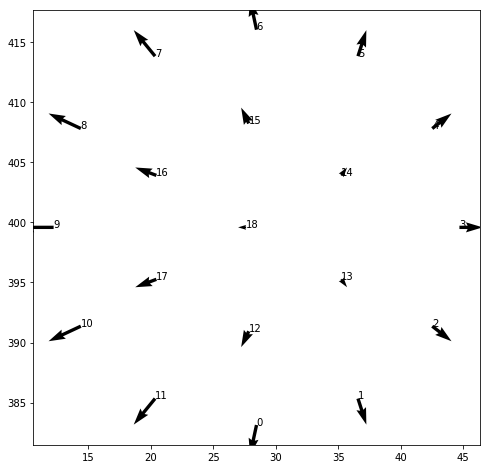

In [12]:
x = []
y = []
z = []

dx = []
dy = []
dz = []
indicies = [] # Note this will be 1 off from PMT number
for PMT_index in range(0, 0+19):
    PMT = geo.GetPMT(PMT_index)

    x.append(PMT.GetPosition(0))
    y.append(PMT.GetPosition(1))
    z.append(PMT.GetPosition(2))

    dx.append(PMT.GetOrientation(0))
    dy.append(PMT.GetOrientation(1))
    dz.append(PMT.GetOrientation(2))

    indicies.append(PMT_index)

plt.figure(figsize=(8,8))
ax = plt.gca()

plt.quiver(z, y, dz, dy)
for i, index in enumerate(indicies):
     ax.annotate(index, (z[i], y[i]))

# Plot barrel

Note that each layer is roughly 50 units apart. Furthermore the endcaps are 50 units away from the highest/lowest ring of the barrel

In [13]:
x = []
y = []
z = []
indicies = [] # Note this will be 1 off from PMT number
for mPMT_index in range(num_pmts//19):
    if is_barrel(mPMT_index):
        pmt_index = mPMT_index * 19 # Converts to pmt_index
        PMT = geo.GetPMT(pmt_index)
        
        x.append(PMT.GetPosition(0))
        y.append(PMT.GetPosition(1))
        z.append(PMT.GetPosition(2))
        indicies.append(pmt_index)

Text(0, 0.5, 'y')

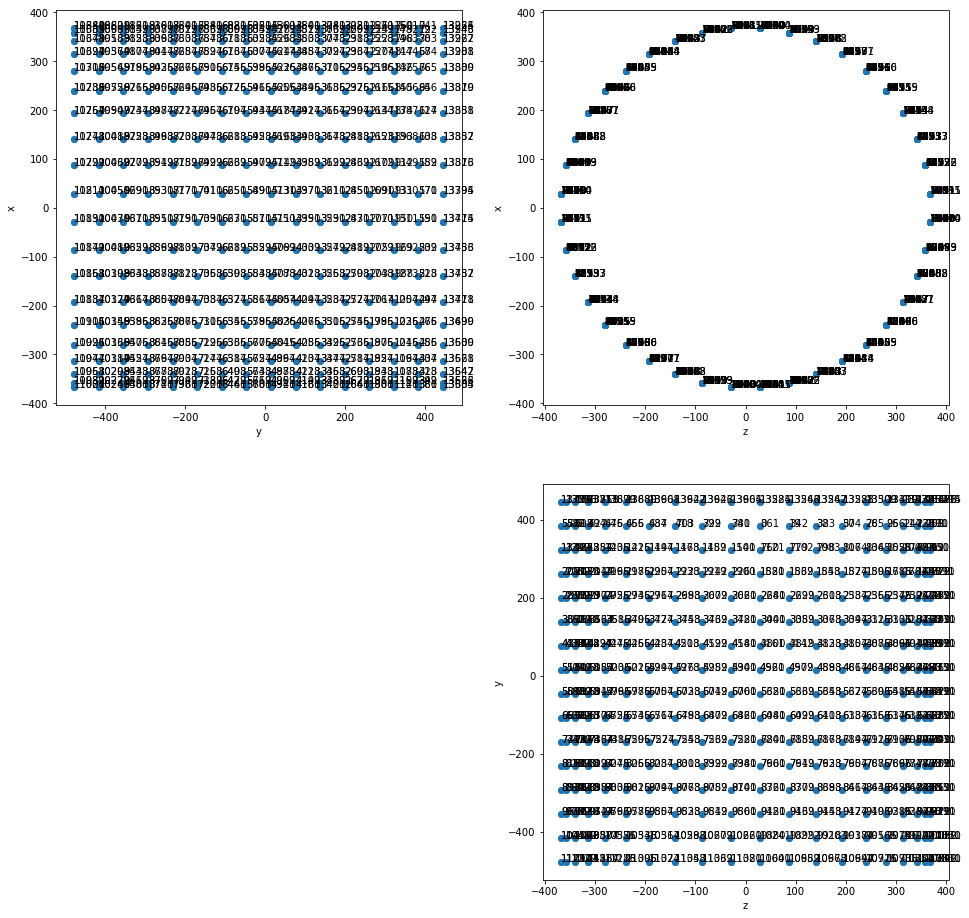

In [14]:
fig = plt.figure(figsize=(16,16))

ax = fig.add_subplot(221)
plt.scatter(y, x)
for i, index in enumerate(indicies):
     ax.annotate(index, (y[i], x[i]))
plt.xlabel("y")
plt.ylabel("x")

ax = fig.add_subplot(222)
plt.scatter(z, x)
for i, index in enumerate(indicies):
     ax.annotate(index, (z[i], x[i]))
plt.xlabel("z")
plt.ylabel("x")        
        
ax = fig.add_subplot(224)
plt.scatter(z, y)
for i, index in enumerate(indicies):
     ax.annotate(index, (z[i], y[i]))
plt.xlabel("z")
plt.ylabel("y")        
        

Text(0, 0.5, 'y')

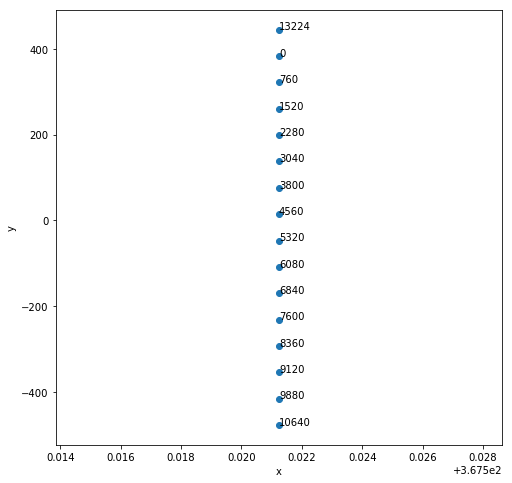

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
plt.scatter(x[::40], y[::40]) # 40 comes from the fact there is 40 mPMT at each height
for i, index in enumerate(indicies[::40]):
     ax.annotate(index, (x[i*40], y[i*40]))
plt.xlabel("x")
plt.ylabel("y")

# Plotting the Top encap

In [16]:
x = []
y = []
z = []

dx = []
dy = []
dz = []

indicies = [] # Note this will be 1 off from PMT number

rx = []
ry = []
rz = []
rindicies = []
for mPMT_index in range(num_pmts//19):
    if is_top(mPMT_index):
        pmt_index = mPMT_index * 19 + 18
        PMT = geo.GetPMT(pmt_index)
        
        x.append(PMT.GetPosition(0))
        y.append(PMT.GetPosition(1))
        z.append(PMT.GetPosition(2))
        
        pmt_index = mPMT_index * 19
        PMT = geo.GetPMT(pmt_index)
        dx.append(PMT.GetOrientation(0))
        dy.append(PMT.GetOrientation(1))
        dz.append(PMT.GetOrientation(2))
        
        indicies.append(pmt_index)
    if isTopRing(mPMT_index):
        pmt_index = mPMT_index * 19
        PMT = geo.GetPMT(pmt_index)
        
        rx.append(PMT.GetPosition(0))
        ry.append(PMT.GetPosition(1))
        rz.append(PMT.GetPosition(2))
        rindicies.append(pmt_index)

In [17]:
print("Top encap is at height (y) = ", y[0])
print("Top ring is at height (y) = ", ry[0])

Top encap is at height (y) =  512.1015014648438
Top ring is at height (y) =  444.6045227050781


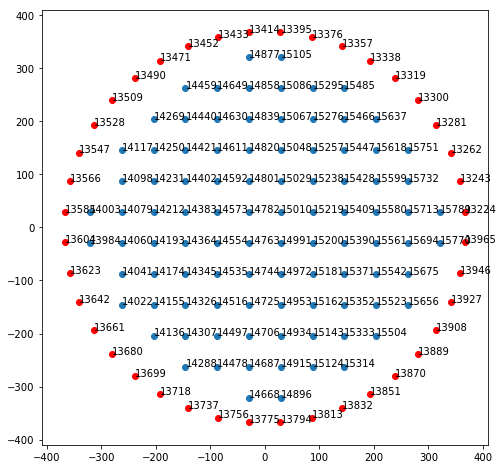

In [18]:
plt.figure(figsize=(8,8))
ax = plt.gca()

plt.scatter(x, z)
for i, index in enumerate(indicies):
     ax.annotate(index, (x[i], z[i]))
        
plt.scatter(rx, rz, c='r')
for i, index in enumerate(rindicies):
     ax.annotate(index, (rx[i], rz[i]))

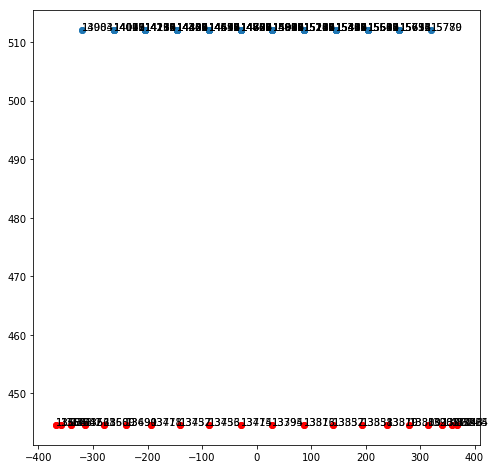

In [19]:
plt.figure(figsize=(8,8))
ax = plt.gca()

plt.scatter(x, y)
for i, index in enumerate(indicies):
     ax.annotate(index, (x[i], y[i]))
        
plt.scatter(rx, ry, c='r')
for i, index in enumerate(rindicies):
     ax.annotate(index, (rx[i], ry[i]))

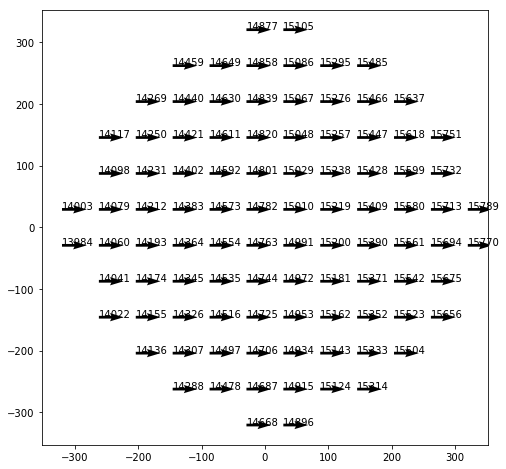

In [20]:
# Note that this orientation is the orientation of node 0 of the mPMT. (in the outer ring)

plt.figure(figsize=(8,8))
ax = plt.gca()

plt.quiver(x, z, dx, dz)
for i, index in enumerate(indicies):
     ax.annotate(index, (x[i], z[i]))

# Plotting the bot encap

In [21]:
x = []
y = []
z = []

dx = []
dy = []
dz = []

indicies = [] # Note this will be 1 off from PMT number

rx = []
ry = []
rz = []
rindicies = []
for mPMT_index in range(num_pmts//19):
    if is_bottom(mPMT_index):
        pmt_index = mPMT_index * 19 + 18
        PMT = geo.GetPMT(pmt_index)
        
        x.append(PMT.GetPosition(0))
        y.append(PMT.GetPosition(1))
        z.append(PMT.GetPosition(2))
        
        pmt_index = mPMT_index * 19
        PMT = geo.GetPMT(pmt_index)
        dx.append(PMT.GetOrientation(0))
        dy.append(PMT.GetOrientation(1))
        dz.append(PMT.GetOrientation(2))
        
        indicies.append(pmt_index)
    if isBotRing(mPMT_index):
        pmt_index = mPMT_index * 19
        PMT = geo.GetPMT(pmt_index)
        
        rx.append(PMT.GetPosition(0))
        ry.append(PMT.GetPosition(1))
        rz.append(PMT.GetPosition(2))
        rindicies.append(pmt_index)

In [22]:
print("Bottom encap is at height (y) = ", y[0])
print("Bottom ring is at height (y) = ", ry[0])

Bottom encap is at height (y) =  -512.1015014648438
Bottom ring is at height (y) =  -477.5204772949219


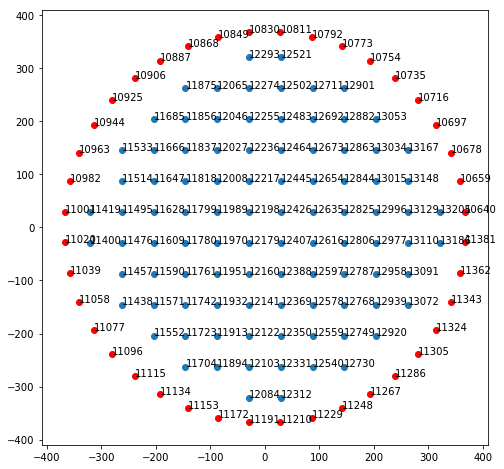

In [23]:
plt.figure(figsize=(8,8))
ax = plt.gca()

plt.scatter(x, z)
for i, index in enumerate(indicies):
     ax.annotate(index, (x[i], z[i]))
        
plt.scatter(rx, rz, c='r')
for i, index in enumerate(rindicies):
     ax.annotate(index, (rx[i], rz[i]))

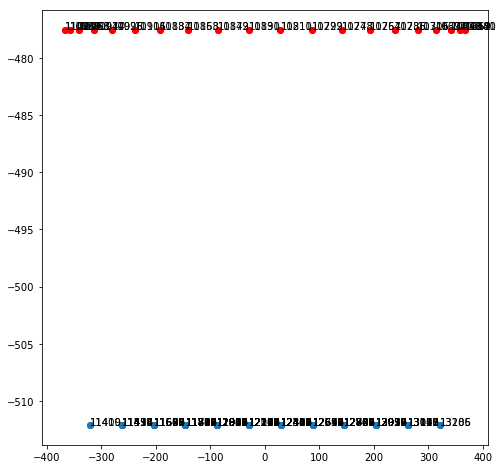

In [24]:
plt.figure(figsize=(8,8))
ax = plt.gca()

plt.scatter(x, y)
for i, index in enumerate(indicies):
     ax.annotate(index, (x[i], y[i]))
        
plt.scatter(rx, ry, c='r')
for i, index in enumerate(rindicies):
     ax.annotate(index, (rx[i], ry[i]))

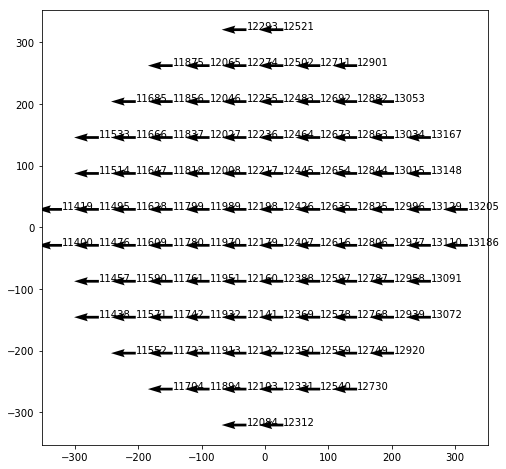

In [25]:
# Note that this orientation is the orientation of node 0 of the mPMT. (in the outer ring)

plt.figure(figsize=(8,8))
ax = plt.gca()

plt.quiver(x, z, dx, dz)
for i, index in enumerate(indicies):
     ax.annotate(index, (x[i], z[i]))

# Orientation of mPMT in bottom endcap

In [26]:
x = []
y = []
z = []

dx = []
dy = []
dz = []
indicies = [] # Note this will be 1 off from PMT number
for PMT_index in range(12312, 12312+19):
    PMT = geo.GetPMT(PMT_index)

    x.append(PMT.GetPosition(0))
    y.append(PMT.GetPosition(1))
    z.append(PMT.GetPosition(2))

    dx.append(PMT.GetOrientation(0))
    dy.append(PMT.GetOrientation(1))
    dz.append(PMT.GetOrientation(2))

    indicies.append(PMT_index)

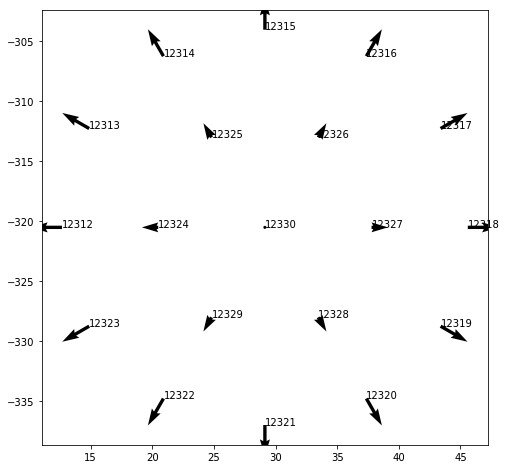

In [27]:
plt.figure(figsize=(8,8))
ax = plt.gca()

plt.quiver(x, z, dx, dz)
for i, index in enumerate(indicies):
     ax.annotate(index, (x[i], z[i]))

# Make sure center PMT is facing center

In [28]:
x = []
y = []
z = []

dx = []
dy = []
dz = []

indicies = [] # Note this will be 1 off from PMT number

for mPMT_index in range(num_pmts//19):
    if is_bottom(mPMT_index):
        pmt_index = mPMT_index * 19 + 18
        PMT = geo.GetPMT(pmt_index)
        
        x.append(PMT.GetPosition(0))
        y.append(PMT.GetPosition(1))
        z.append(PMT.GetPosition(2))
        
        dx.append(PMT.GetOrientation(0))
        dy.append(PMT.GetOrientation(1))
        dz.append(PMT.GetOrientation(2))
        
        indicies.append(pmt_index)

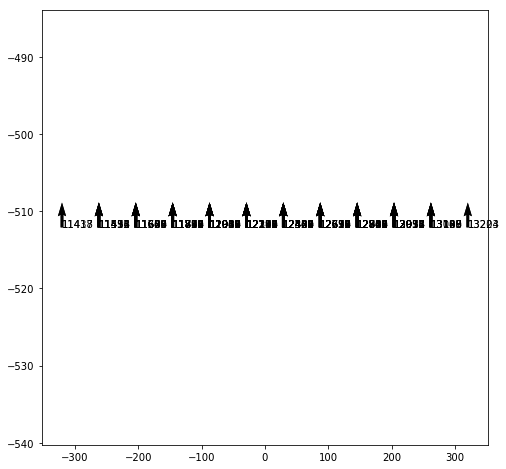

In [29]:
plt.figure(figsize=(8,8))
ax = plt.gca()

plt.quiver(x, y, dx, dy)
for i, index in enumerate(indicies):
     ax.annotate(index, (x[i], y[i]))

# Direction of top endcap vs bottem endcap

Notice that 0 PMT index is facing opposite directions for the top and bottom endcap

In [30]:
tx = []
ty = []
tz = []

tdx = []
tdy = []
tdz = []

tindicies = [] # Note this will be 1 off from PMT number

bx = []
by = []
bz = []

bdx = []
bdy = []
bdz = []

bindicies = [] # Note this will be 1 off from PMT number

for mPMT_index in range(num_pmts//19):
    if is_bottom(mPMT_index):
        pmt_index = mPMT_index * 19
        PMT = geo.GetPMT(pmt_index)
        
        bx.append(PMT.GetPosition(0))
        by.append(PMT.GetPosition(1))
        bz.append(PMT.GetPosition(2))
        
        bdx.append(PMT.GetOrientation(0))
        bdy.append(PMT.GetOrientation(1))
        bdz.append(PMT.GetOrientation(2))
        
        bindicies.append(pmt_index)
    if is_top(mPMT_index):
        pmt_index = mPMT_index * 19
        PMT = geo.GetPMT(pmt_index)
        
        tx.append(PMT.GetPosition(0))
        ty.append(PMT.GetPosition(1))
        tz.append(PMT.GetPosition(2))
        
        tdx.append(PMT.GetOrientation(0))
        tdy.append(PMT.GetOrientation(1))
        tdz.append(PMT.GetOrientation(2))
        
        tindicies.append(pmt_index)

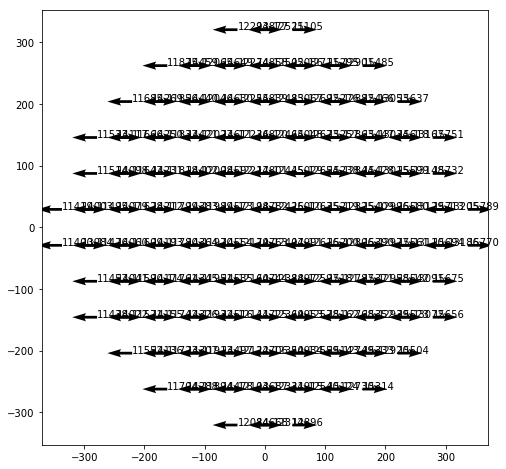

In [31]:
plt.figure(figsize=(8,8))
ax = plt.gca()

plt.quiver(bx, bz, bdx, bdz)
for i, index in enumerate(bindicies):
     ax.annotate(index, (bx[i], bz[i]))
        
plt.quiver(tx, tz, tdx, tdz)
for i, index in enumerate(tindicies):
     ax.annotate(index, (tx[i], tz[i]))

# Now we map the index to an image

https://docs.google.com/spreadsheets/d/1XCP3zkbpVawKvLbTMLIOvTFyJETBg3FgcHf9CT1ZHSE/edit#gid=1498105215

The indices can be seen here

Using sheet 3 of the document, we will create a dictionary by loading in the CSV and turning it into a dictionary

In [32]:
csv_file = "mPMT_to_row_col.csv"
def GenMapping(csv_file):
    mPMT_to_index = {}
    with open(csv_file) as f:
        rows = f.readline().split(",")[1:]
        rows = [int(r.strip()) for r in rows]

        for line in f:
            line_split = line.split(",")
            col = int(line_split[0].strip())
            for row, value in zip(rows, line_split[1:]):
                value = value.strip()
                if value: # If the value is not empty
                    mPMT_to_index[int(value)] = [row, col]
    return mPMT_to_index

mPMT_to_index = GenMapping(csv_file)

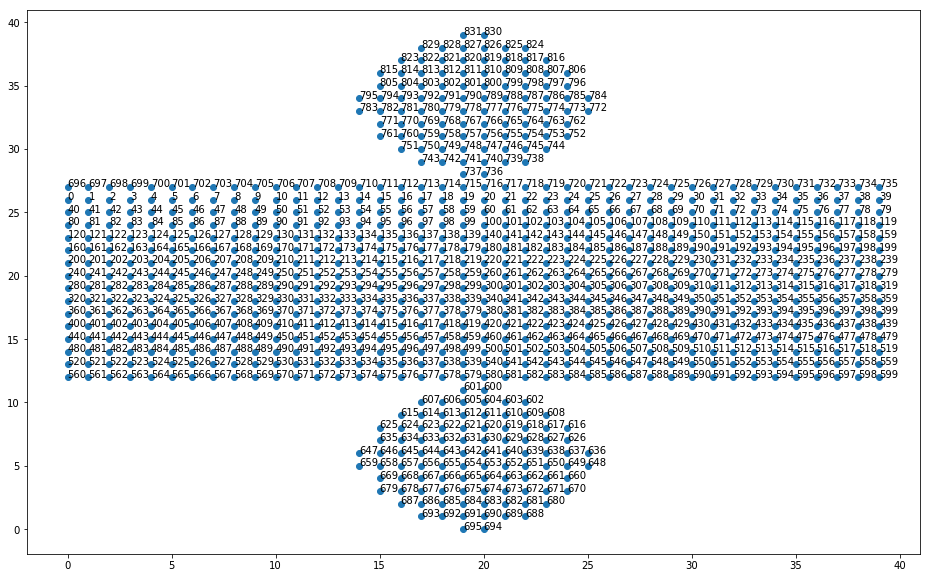

In [33]:
xs = []
ys = []
texts = []
for mPMT_index in range(num_pmts//19):
    index = mPMT_to_index[mPMT_index]
    xs.append(index[0])
    ys.append(index[1])
    texts.append(mPMT_index)

fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.scatter(xs,ys)
for x, y, text in zip(xs, ys, texts):
    ax.annotate(text, (x,y))
    

# Look at orientation to figure out order of PMTs in mPMT

In [34]:
xs = []
ys = []

dxs = []
dys = []
dzs = []

for mPMT_index in range(num_pmts//19):    
    index = mPMT_to_index[mPMT_index]
    xs.append(index[0])
    ys.append(index[1])
    
    pmt_index = mPMT_index * 19 + 18 # 18 would be the center of the mPMT
    PMT = geo.GetPMT(pmt_index)
    dxs.append(PMT.GetOrientation(0))
    dys.append(PMT.GetOrientation(1))
    dzs.append(PMT.GetOrientation(2))

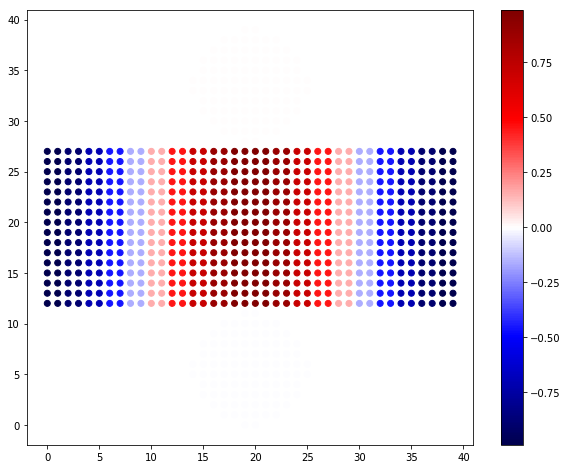

In [35]:
plt.figure(figsize=(10,8))
plot = plt.scatter(xs, ys, c=dxs, cmap=plt.cm.seismic)
plt.colorbar(plot)

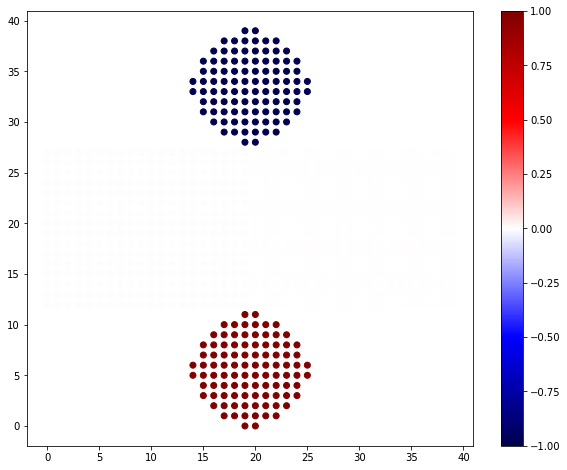

In [36]:
plt.figure(figsize=(10,8))
plot = plt.scatter(xs, ys, c=dys, cmap=plt.cm.seismic)
plt.colorbar(plot)

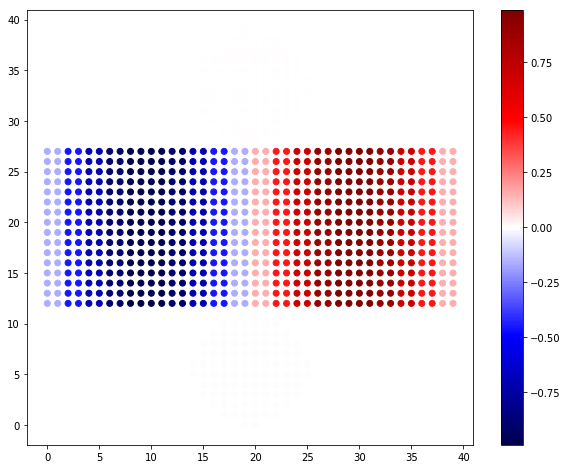

In [37]:
plt.figure(figsize=(10,8))
plot = plt.scatter(xs, ys, c=dzs, cmap=plt.cm.seismic)
plt.colorbar(plot)

In [38]:
xs = []
ys = []

dxs = []
dys = []
dzs = []

for mPMT_index in range(num_pmts//19):    
    index = mPMT_to_index[mPMT_index]
    xs.append(index[0])
    ys.append(index[1])
    
    pmt_index = mPMT_index * 19 + 0 # 0 would be the outer ring of the mPMT
    PMT = geo.GetPMT(pmt_index)
    dxs.append(PMT.GetOrientation(0))
    dys.append(PMT.GetOrientation(1))
    dzs.append(PMT.GetOrientation(2))

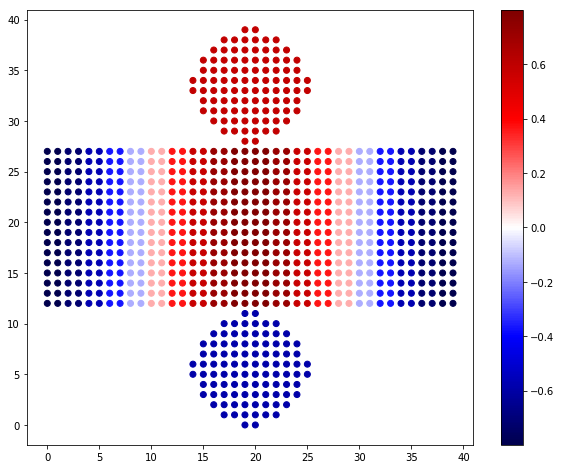

In [39]:
plt.figure(figsize=(10,8))
plot = plt.scatter(xs, ys, c=dxs, cmap=plt.cm.seismic)
plt.colorbar(plot)

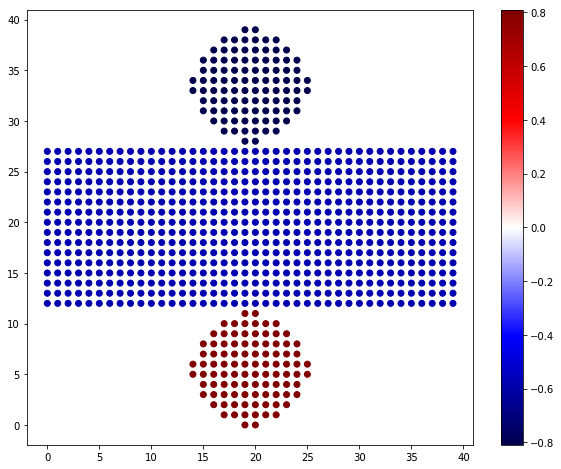

In [40]:
plt.figure(figsize=(10,8))
plot = plt.scatter(xs, ys, c=dys, cmap=plt.cm.seismic)
plt.colorbar(plot)

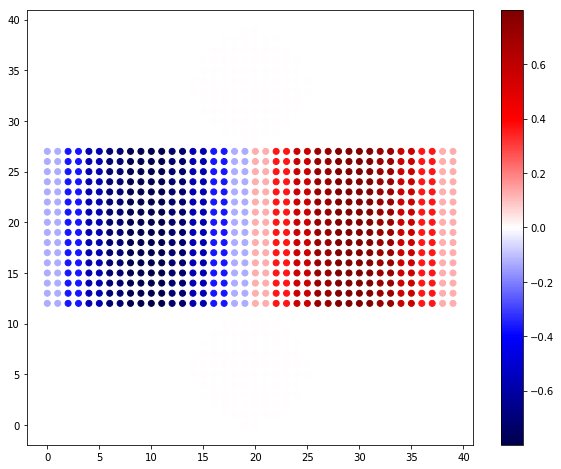

In [41]:
plt.figure(figsize=(10,8))
plot = plt.scatter(xs, ys, c=dzs, cmap=plt.cm.seismic)
plt.colorbar(plot)